# Reference cell selection
In this notebook we show the application of several different methods developed for the automatic and manual selection of reference cells.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import mmread
from SEMITONES.cell_selection import from_knn_dist
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import pairwise_distances, pairwise_kernels

In [2]:
os.chdir("../data/processed/")

In [3]:
cells = pd.read_csv("supplemental_cell_selections.txt", sep="\t",
                    index_col=0)

In [4]:
UMAP = np.load("greenleaf_scRNA_combined_umap.npy")

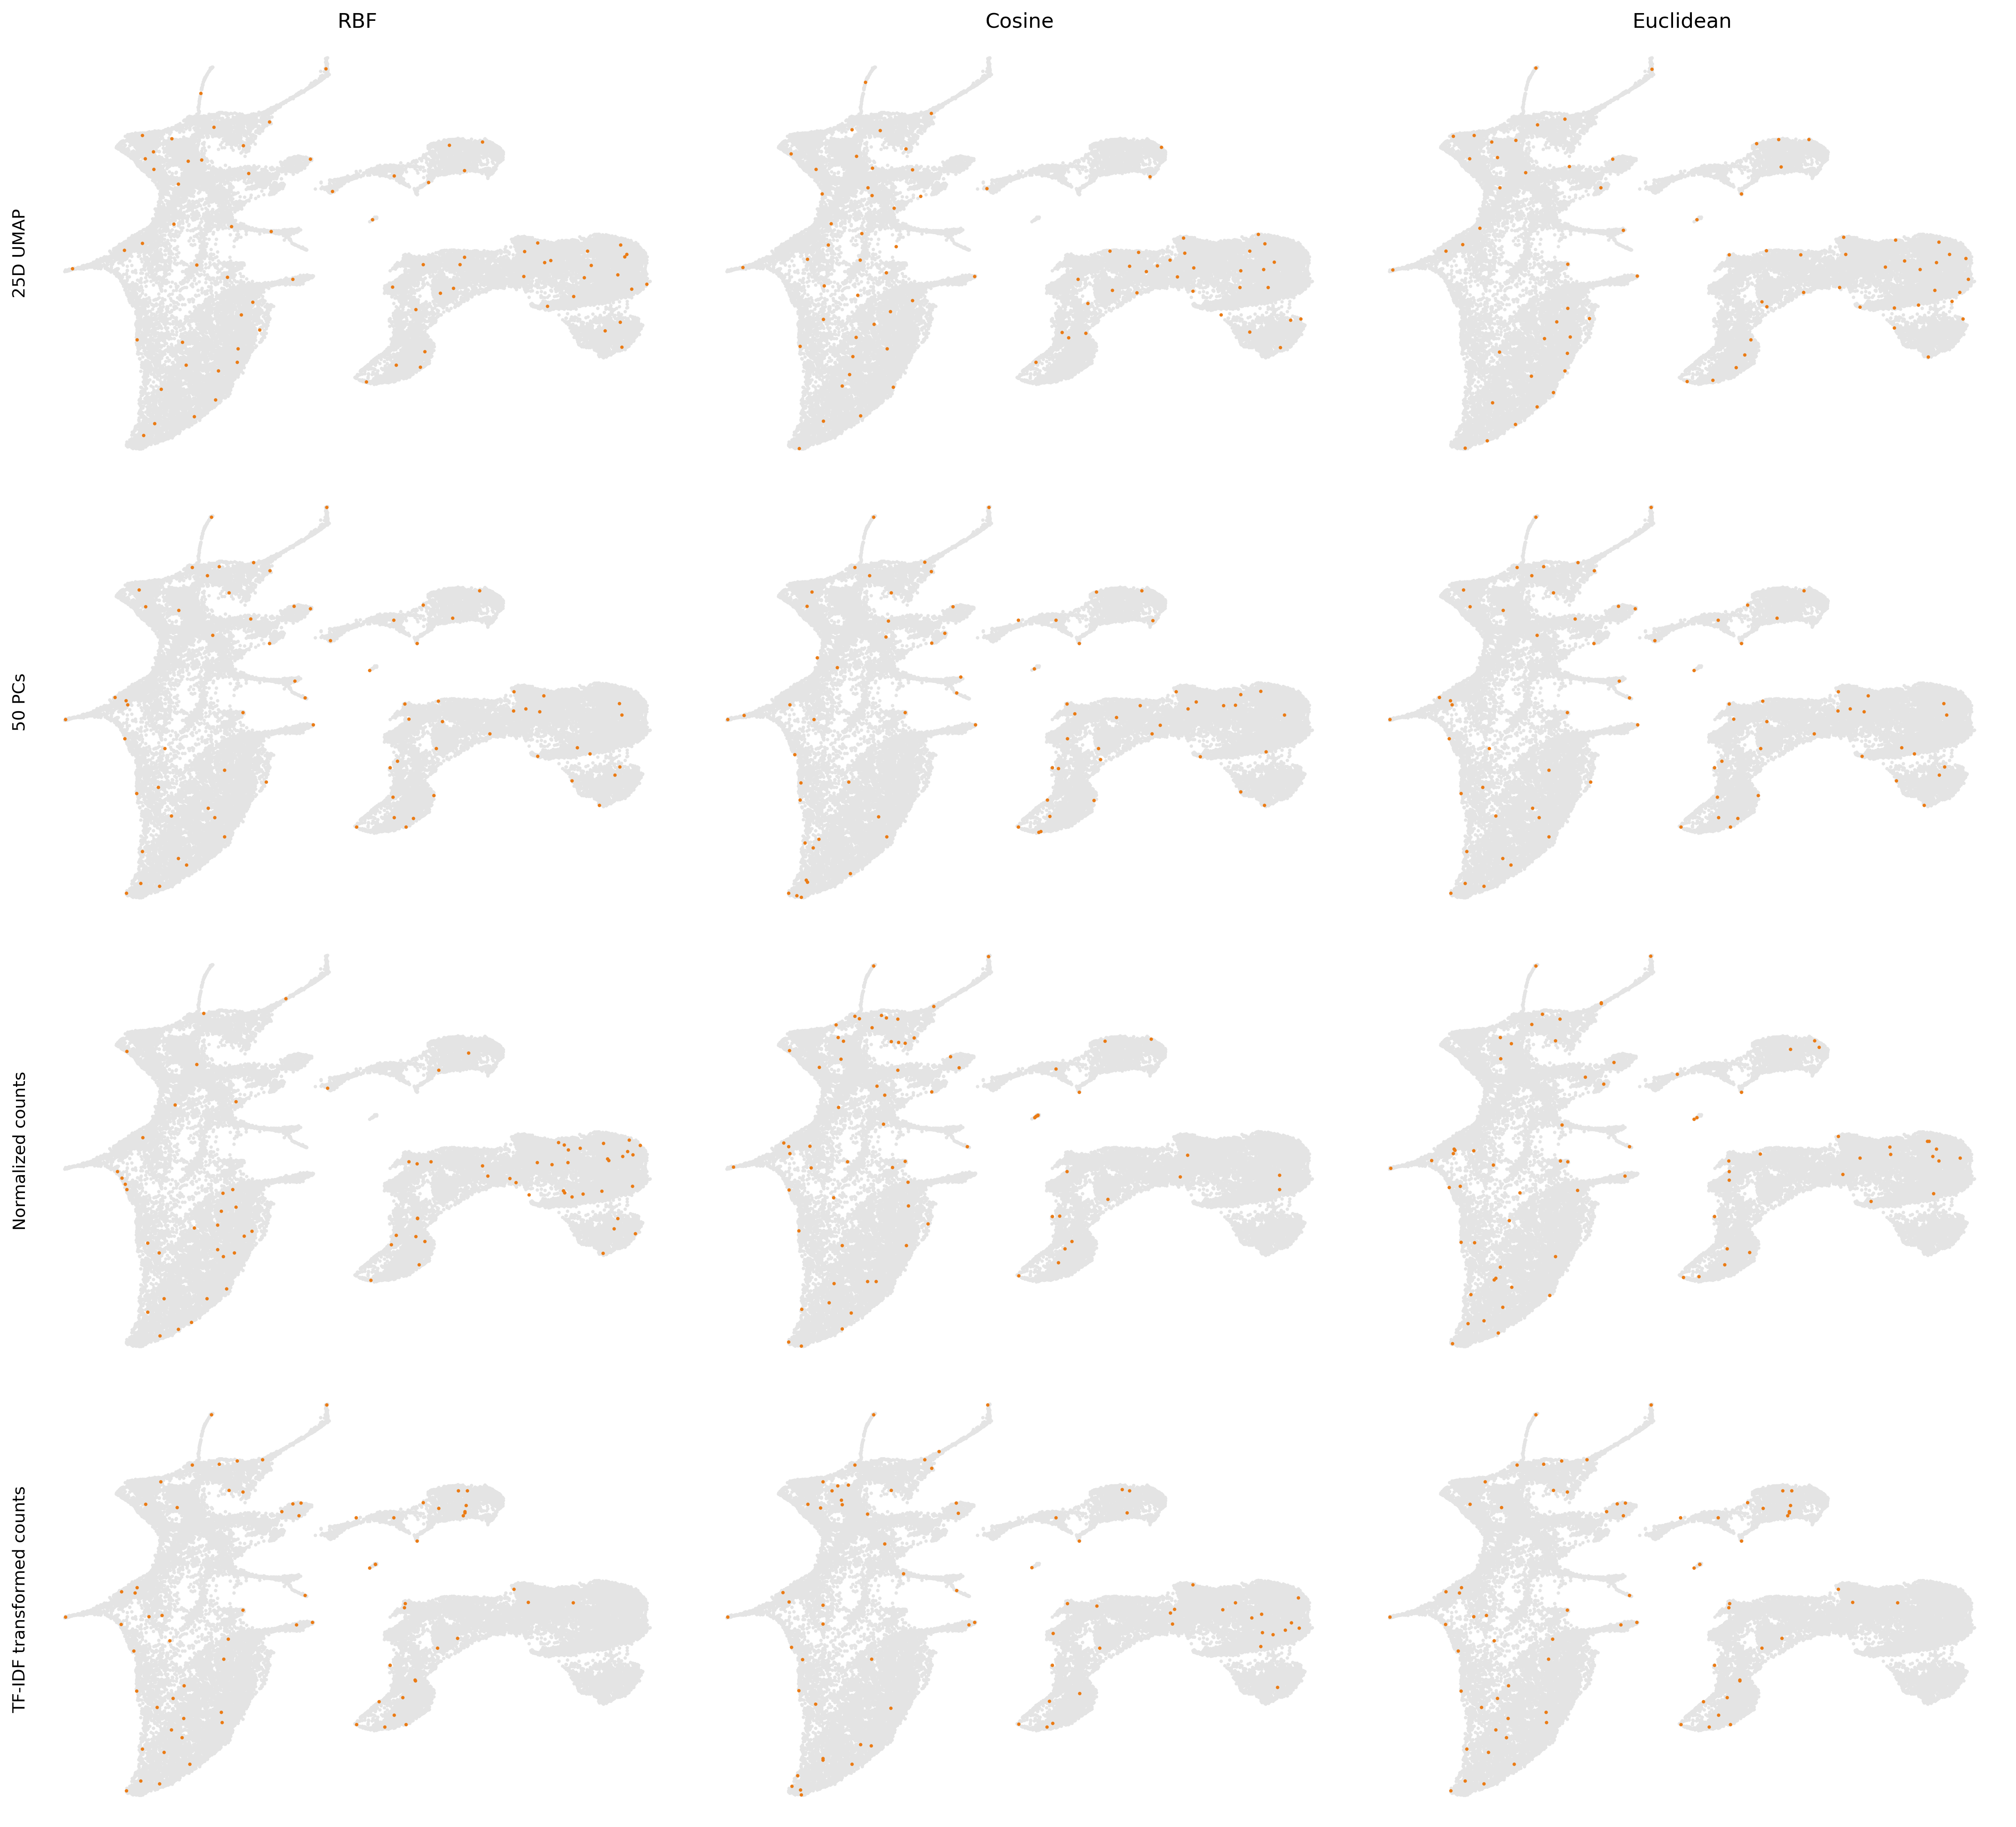

In [5]:
fig, axs = plt.subplots(4, 3, dpi=300)
fig.set_figwidth(8.27*2)
fig.subplots_adjust(wspace=0.3)
fig.set_figheight(15)
for c, ax in zip(cells.index, axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], c="#e4e4e4", s=1)
    ax.scatter(UMAP[cells.loc[c, :], 0], UMAP[cells.loc[c, :], 1],
               c="#eb7b14", s=1)
    ax.get_xaxis().set_visible(False)
    ax.set_yticks([])
    ax.set_frame_on(False)
axs[0][0].set_title("RBF")
axs[0][1].set_title("Cosine")
axs[0][2].set_title("Euclidean")
axs[0][0].set_ylabel("25D UMAP")
axs[1][0].set_ylabel("50 PCs")
axs[2][0].set_ylabel("Normalized counts")
axs[3][0].set_ylabel("TF-IDF transformed counts")
plt.tight_layout()